In [40]:
from datasets import load_dataset

from protest_impact.util import project_root

aglpn = load_dataset(
    str(project_root / "data" / "protest"),
    data_files={"main": "protest_news_annotated_v1.jsonl"},
)
aglpn["main"] = aglpn["main"].filter(lambda x: x["answer"] != "ignore")

Using custom data configuration protest-db1d3e4a3a280c30
Found cached dataset json (/Users/david/.cache/huggingface/datasets/json/protest-db1d3e4a3a280c30/0.0.0/0f7e3662623656454fcd2b650f34e886a7db4b9104504885bd462096cc7a9f51)


  0%|          | 0/1 [00:00<?, ?it/s]

Loading cached processed dataset at /Users/david/.cache/huggingface/datasets/json/protest-db1d3e4a3a280c30/0.0.0/0f7e3662623656454fcd2b650f34e886a7db4b9104504885bd462096cc7a9f51/cache-bfcbb26ed3ee8b56.arrow


In [23]:
len(aglpn["main"])

1150

In [19]:
# convert to binary classification
aglpn["main"] = aglpn["main"].map(
    lambda x: {"accept": 1 if x["accept"] == ["relevant"] else 0}
)
aglpn["main"]["accept"][:5]

  0%|          | 0/1150 [00:00<?, ?ex/s]

[0, 1, 1, 1, 0]

In [20]:
# convert to binary classification
aglpn["main"] = aglpn["main"].map(
    lambda x: {"answer": 1 if x["answer"] == "accept" else 0}
)
aglpn["main"]["answer"][:5]

  0%|          | 0/1150 [00:00<?, ?ex/s]

[1, 1, 1, 1, 1]

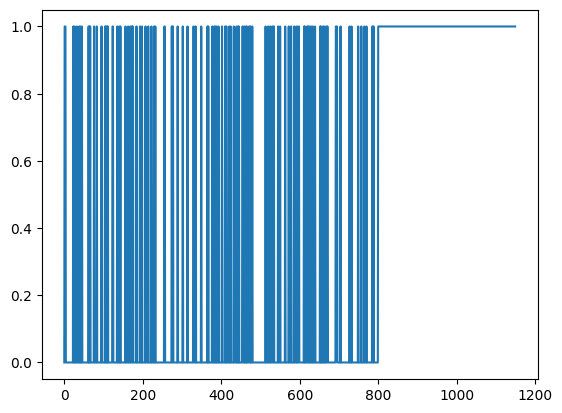

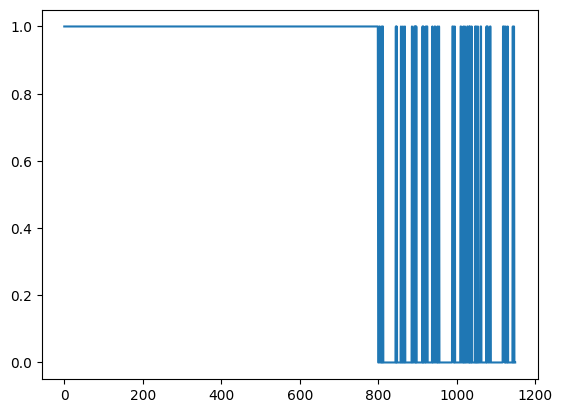

In [35]:
import matplotlib.pyplot as plt

# plot both "accept" and "answer" labels
import pandas as pd

df = pd.DataFrame(aglpn["main"])
df["accept"].plot(kind="line")
plt.show()
df["answer"].plot(kind="line")
plt.show()

In [24]:
800 / 1150

0.6956521739130435

In [25]:
55 / 69.56

0.7906843013225991

In [43]:
aglpn["main"] = aglpn["main"].map(
    function=(
        lambda x, i: {
            "label": (1 if x["accept"] == ["relevant"] else 0)
            if i < 800
            else (1 if x["answer"] == "accept" else 0)
        }
    ),
    with_indices=True,
)
aglpn["main"]["label"][:5]

  0%|          | 0/1150 [00:00<?, ?ex/s]

[0, 1, 1, 1, 0]

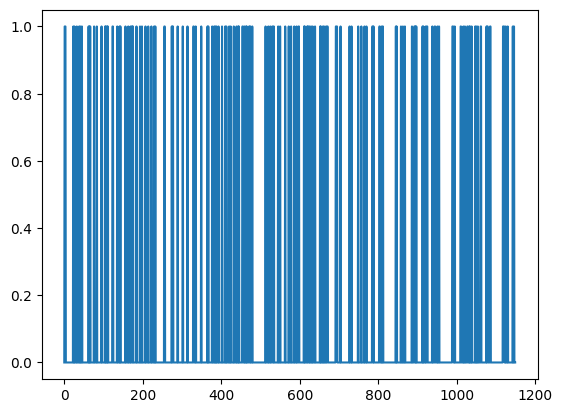

In [44]:
df = pd.DataFrame(aglpn["main"])
df["label"].plot(kind="line")
plt.show()

In [1]:
from protest_impact.data.protests.detection import load_aglpn_dataset

aglpn = load_aglpn_dataset()

Using custom data configuration protest-db1d3e4a3a280c30
Found cached dataset json (/Users/david/.cache/huggingface/datasets/json/protest-db1d3e4a3a280c30/0.0.0/0f7e3662623656454fcd2b650f34e886a7db4b9104504885bd462096cc7a9f51)


  0%|          | 0/1 [00:00<?, ?it/s]

Loading cached processed dataset at /Users/david/.cache/huggingface/datasets/json/protest-db1d3e4a3a280c30/0.0.0/0f7e3662623656454fcd2b650f34e886a7db4b9104504885bd462096cc7a9f51/cache-d5126aa63730299d.arrow


  0%|          | 0/1150 [00:00<?, ?ex/s]

  0%|          | 0/575 [00:00<?, ?ex/s]

  0%|          | 0/115 [00:00<?, ?ex/s]

  0%|          | 0/460 [00:00<?, ?ex/s]

In [7]:
import json

from protest_impact.util import project_root

with open(project_root / "data" / "news" / "protest_news_shuffled_v2.jsonl") as f:
    news = [json.loads(line) for line in f]

# save random sample of 20000 news articles in separate file
import random

random.seed(42)
random.shuffle(news)
# with open(project_root / "data" / "news" / "protest_news_shuffled_v2_sample.jsonl", "w") as f:
#     for line in news[:20000]:
#         f.write(json.dumps(line) + "\n")
news = news[:20000]

In [8]:
import json

items = []
for i in range(200):
    with open(f"somefile-{i}.jsonl") as f:
        items += json.loads(f.read())

len(items)

20000

In [14]:
for new, item in zip(news, items):
    new["label"] = int(item["label"][-1])
    new["score"] = item["score"]

In [12]:
len([i for i in items if i["label"] == "LABEL_1"])

3931